In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from keras.datasets import mnist
from matplotlib import pyplot

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


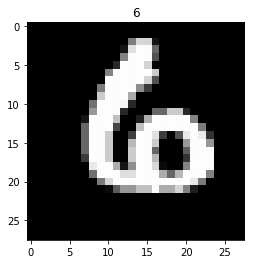

In [3]:
import random
i=random.randint(1,60000)
plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.title(y_train[i])
plt.show()

In [4]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,MaxPooling2D,Flatten,Conv2D

In [5]:
#normalise
X_train = X_train/255.0
X_test = X_test/255.0
#reshape for input layers
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
#one-hot encoding
y_test = to_categorical(y_test , num_classes=10)
y_train = to_categorical(y_train , num_classes=10)

In [7]:
#creating the model
model = Sequential()
#input layer
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation = 'relu', input_shape=(28,28,1)))
#Conv layer2
model.add(Conv2D(filters=32, kernel_size=(5,5), padding ='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
#Conv layer3
model.add(Conv2D(filters=64, kernel_size=(5,5), padding ='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(Flatten())
#Fully connected layer now
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
#output layer
model.add(Dense(10,activation='softmax'))

In [9]:
from keras.optimizers import Adam
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, batch_size=20, verbose=1, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 558s 9ms/step - loss: 0.1070 - acc: 0.9663
Epoch 2/5
60000/60000 [==============================] - 582s 10ms/step - loss: 0.0446 - acc: 0.9872
Epoch 3/5
60000/60000 [==============================] - 608s 10ms/step - loss: 0.0346 - acc: 0.9898
Epoch 4/5
60000/60000 [==============================] - 627s 10ms/step - loss: 0.0277 - acc: 0.9917
Epoch 5/5
60000/60000 [==============================] - 592s 10ms/step - loss: 0.0226 - acc: 0.9933


In [11]:
score = model.evaluate(X_test,y_test)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

10000/10000 [==============================] - 27s 3ms/step
Loss:  0.020661514111148426
Accuracy:  0.9935
